<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yassaee</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Arian Bastani

**Student ID**: 400100073

---


# Understanding Linear Regression

Linear regression is one of the simplest and most fundamental techniques in statistics and machine learning. It involves modeling the relationship between a dependent variable (target $y$) and one or more independent variables (predictors $x_1, .., x_n$) by fitting a linear equation to the observed data. The goal of linear regression is to find the line or the hyperplane that best predicts the target variable from the predictors. This method assumes that there is a linear relationship between the variables, which means that changes in the predictor variables will lead to proportional changes in the target variable.

# Importing Libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

Furthermore, note that Running the model on your GPU has BONUS POINTS. If you would like to do so, you can run the cell below. It will seach for CUDA and if it finds it, it will assign the device to cuda, otherwise it will run on your CPU.

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("CUDA is available. Using GPU.")
else:
    device = torch.device('cpu')
    print("CUDA is not available. Using CPU.")

CUDA is available. Using GPU.


f you are using Colab, please note that you must upload the dataset to your Google Drive associated with the email registered with Colab. After completing the authentication process, you can mount your Drive and then import the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing the dataset & some cleanning:

To start, familiarize yourself with the dataset after importing it. Examine every detail of the data, including the number of rows and columns, and calculate the mean and standard deviation for each column. We will use the "CO2" dataset for the purpose of linear regression. You can locate this file by the name `global_co2.csv` Since we don't have data from before 1960, make sure to filter out any entries from before this year.

In [ ]:
# TODO: Read the dataset using pandas and save it into a dataframe
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_CHW/2/global_co2.csv'
df = pd.read_csv(file_path)
# TODO: Discard the data before 1960
climate_change_df = df[df['Year'] >= 1960]
# TODO: Describe the dataset(dataframe)
df.describe()

,Year,CO2,Temperature
count,131.000000,131.000000,131.000000
mean,1945.000000,2746.816794,0.016404
std,37.960506,2538.162090,0.282472
min,1880.000000,236.000000,-0.444100
25%,1912.500000,827.500000,-0.201350
50%,1945.000000,1383.000000,-0.061800
75%,1977.500000,5056.500000,0.179500
max,2010.000000,9167.000000,0.700800




Now, we are going to perform a 3D linear regression using two features:
$x_1$(:`Year`), $x_2$(:`Temperature`). Our goal is to fit a linear dependency for $y$(: `CO2`). From our dataframe, drop the other columns and store the data of these columns into parameters `x1`, `x2`, and `y`.


In [ ]:
# TODO: Store the values for each column into their respective parameter
x1 = climate_change_df['Year']
x2 = climate_change_df['Temperature']
y = climate_change_df['CO2']

# Visualizing the data:

Now, using the `matplotlib` library, visualize the dataset. The visualization should show `CO2`  along the vertical axis, with `Year` and `Temperature` on the surface. Determine whether a linear model fits the data. Is it appropriate to use a linear model in this case? Explain your reasoning.

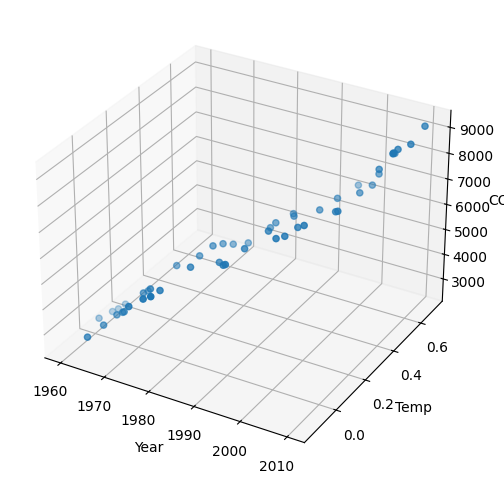

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
# TODO: Plot the CO2 Emission with respect to Year & Tempreture
ax = fig.add_subplot(projection='3d')
ax.scatter(x1, x2, y)
ax.set_xlabel('Year')
ax.set_ylabel('Temp')
ax.set_zlabel('CO2')

plt.show()

Futhermore, investigate the relation between $y$-$x_1$ and $y$-$x_2$ respectivly by plotting them into a 2d surface.

Text(0, 0.5, 'CO2')

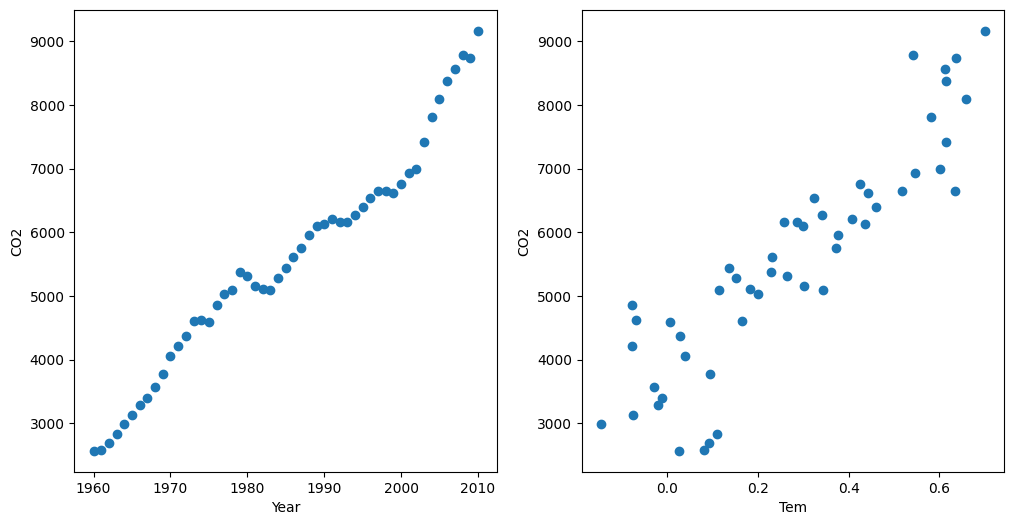

In [ ]:
fig = plt.figure(figsize=(12,6))
# TODO: Plot the relationship between 'Year' and 'CO2 Emissions'
plt.subplot(1,2,1)
plt.scatter(x1, y)
plt.xlabel('Year')
plt.ylabel('CO2')
# TODO: Plot the relationship between 'Temperature' and 'CO2 Emissions'
plt.subplot(1,2,2)
plt.scatter(x2, y)
plt.xlabel('Tem')
plt.ylabel('CO2')

# Training the data - Definig the model

Now, split the data into training and testing sets. The test data will be used for evaluating the model's performance, while the training data will be used for training the model and extracting the model's weights. Next, define a linear regression model and train it using the training data. After the training is completed, print the weights of the model.

In [ ]:
# TODO: split the data into test and train
X = climate_change_df[['Year', 'Temperature']].values
Y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# TODO: Define a linear regression model and then feed it with train data
reg = LinearRegression()
reg.fit(X_train, y_train)

# TODO: print the score of the model.
print(f'w_year = {reg.coef_[0]}, w_temp = {reg.coef_[1]}, b = {reg.intercept_}')

w_year = 118.34559956100992, w_temp = -203.20833974204868, b = -229278.30653937315


# Evaluating the trained model

Now evaluate your model using MMSE, $R^2$ criterions, how well is your model trained?

In [ ]:
# TODO: Calculate the Mean Squared Error (MMSE)
y_hat = reg.predict(X_test)
mmse = mean_squared_error(y_test, y_hat)
print(f'MMSE = {mmse}')
R2 = r2_score(y_test, y_hat)
print(f'R2 = {R2}')

MMSE = 36508.95027519938
R2 = 0.9737403712146


n this section, we will repeat the data plotting, but this time we will also include the predictions of our model. This will allow us to investigate whether the model has successfully fitted the data.

Text(0.5, 0, 'CO2')

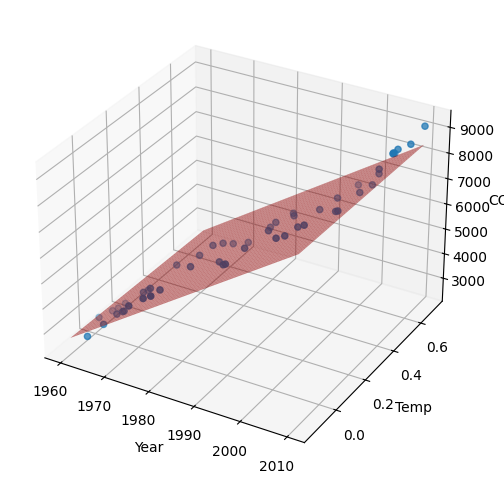

In [ ]:
# TODO: Define the line by the weights of the model
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
Y = reg.coef_[0]*X1 + reg.coef_[1]*X2 + reg.intercept_
ax.plot_surface(X1, X2, Y, alpha=0.5, color='r')
# TODO: plot the hyperplane and the data
ax.scatter(x1, x2, y)
ax.set_xlabel('Year')
ax.set_ylabel('Temp')
ax.set_zlabel('CO2')

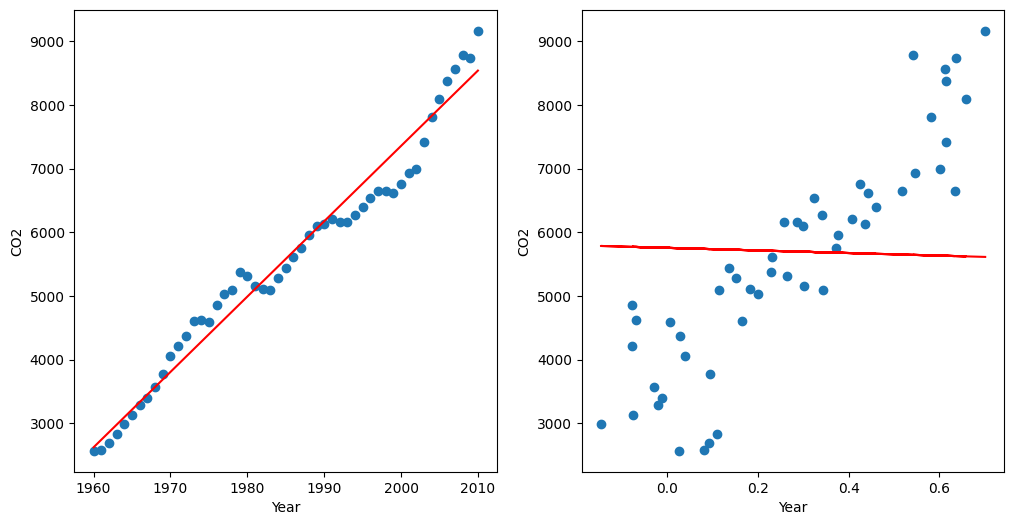

In [ ]:
# TODO: Repeat the 2d plotting as well (y-x1) and (y-x2)
fig = plt.figure(figsize=(12,6))
# TODO: Plot the relationship between 'Year' and 'CO2 Emissions'
plt.subplot(1,2,1)
plt.scatter(x1, y)
plt.xlabel('Year')
plt.ylabel('CO2')

y_hat1 = reg.coef_[0] * x1 + reg.coef_[1] * np.mean(x2) +  reg.intercept_
plt.plot(x1, y_hat1, color='r')
# TODO: Plot the relationship between 'Year' and 'CO2 Emissions'
plt.subplot(1,2,2)
plt.scatter(x2, y)
plt.xlabel('Year')
plt.ylabel('CO2')

y_hat2 = reg.coef_[0] * np.mean(x1) + theta[1] * x2 + reg.coef_[0] + reg.intercept_
plt.plot(x2, y_hat2, color='r')

# Implementing your own Linear Regression model

Complete the following two functions. For `gradient_descent()`, you should determine the appropriate method for updating
$\theta$
 by computing the gradient and applying gradient descent. Additionally, ensure the `compute_cost()` function is correctly implemented.

Optimal parameters (theta): [[3.90261498]
 [3.04601728]]


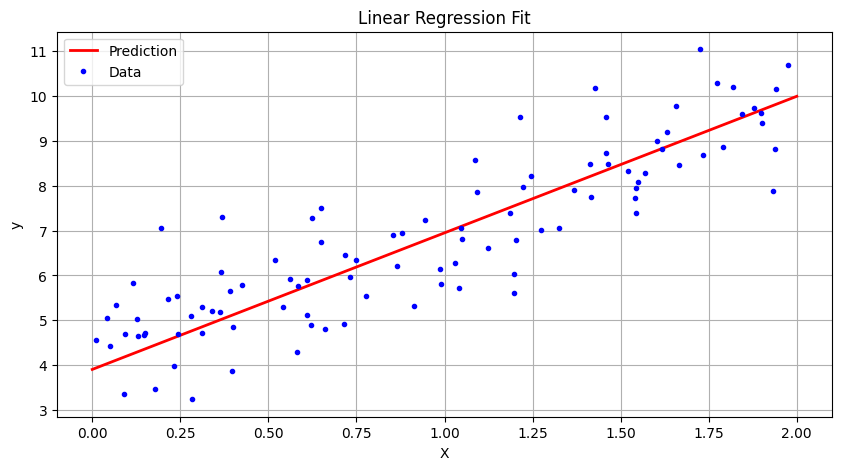

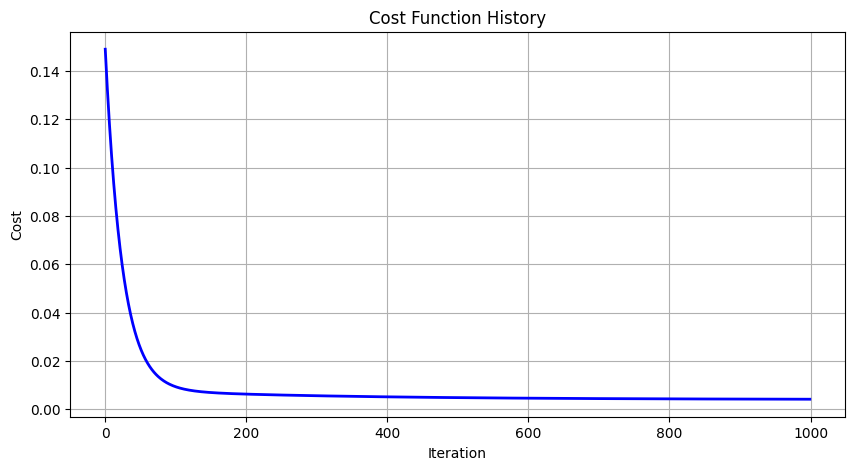

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]

def compute_cost(theta, X, y):
    # TODO:
    y_hat = X @ theta
    return np.mean((y_hat - y)**2) / 2 / np.size(y)


def gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000):
    m = len(y)
    cost_history = np.zeros(n_iterations)

    for i in range(n_iterations):
        # TODO: compute the gradient and update the theta
        gradients = X.T @ (X @ theta - y) / m
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(theta, X, y)

    return theta, cost_history


theta = np.random.randn(2, 1)
theta_best, cost_history = gradient_descent(X_b, y, theta)
print(f"Optimal parameters (theta): {theta_best}")
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.plot(X, y, "b.", label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()

# Plot the cost function history
plt.figure(figsize=(10, 5))
plt.plot(range(len(cost_history)), cost_history, "b-", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.grid(True)
plt.show()


# Ridge Resgression:
Ridge regression, also known as Tikhonov regularization, is a method used to address multicollinearity in linear regression models. It introduces a penalty term to the regression objective, effectively shrinking the coefficients towards zero. This penalty term acts as a prior on the weights, encouraging the model to favor simpler solutions with smaller coefficients. By doing so, ridge regression reduces the variance of the model, leading to more stable and generalizable predictions.

Mathematically, ridge regression can be formulated as follows:

**Prior**:


$ \theta \sim \mathcal{N}(0, \sigma^2I) $



**Optimization Objective**:


$ \min_{\theta} \left( \sum_{i=1}^{n} \left(y_i - \theta^T x_i \right)^2 + \lambda \|\theta\|_2^2 \right) $



Where:
- $ \theta $ is the vector of coefficients.
- $ y_i $ is the actual value.
- $ x_i $ is the vector of input features.
- $ \lambda $ is the regularization parameter.
- $ \|\theta\|_2^2 $ is the L2 norm of the coefficients (sum of the squared coefficients).

The regularization term $( \lambda || \theta||_2^2 $) forces the model to keep the coefficients small, pushing the solution towards the origin (Why??). This helps in situations where multicollinearity (high correlation between predictors) or overfitting (model performing well on training data but poorly on unseen data) is a concern.





Now explain **When to Use Ridge Regression**:  Ridged Regression is usefull when our data is complex and noisy and we want to keep our model simple.





Also explain **the effect of the regularization parameter**: The regularization coefficient balances the trade-off between fitting the training data and keeping the model simple by penalizing large weights.


Now This partt is BONUS!
Apply Ridge Regrssion on our dataset above (for simplicity you can solve this for a one-dimonsional $x$, keep$x_1$ for instance and discard the other parameter $x_2$). Then change $\lambda$ and plot the train and test error with respect to $\lambda$

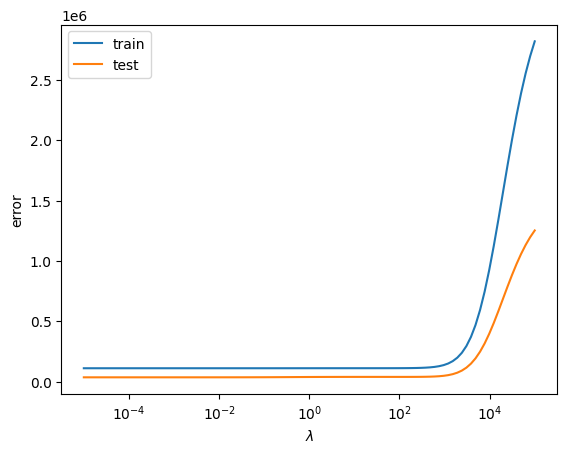

In [ ]:
# TODO: Apply Ridge Regression and vary lambda

 # Range of lambda values -- you can
lambdas = np.logspace(-5, 5, 100)
train_errors = []
test_errors = []

for l in lambdas:
    ridge_reg = Ridge(alpha=l)
    ridge_reg.fit(X_train, y_train)

    y_train_hat = ridge_reg.predict(X_train)
    y_test_hat = ridge_reg.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_hat))
    test_errors.append(mean_squared_error(y_test, y_test_hat))

# TODO: Plot train and test errors with respect to lambda
plt.plot(lambdas, train_errors)
plt.plot(lambdas, test_errors)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('error')
plt.legend(['train', 'test'])